In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/home/gabriel/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
def plot_confusion_matrix(cm, classes=None, norm=True, title='Confusion matrix', ax=None, **kwargs):
    """Plots a confusion matrix."""
    heatmap_kwargs = dict(annot=True, fmt='d')
    if norm:
        cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
        heatmap_kwargs['data'] = cm_norm
        heatmap_kwargs['vmin']=0.
        heatmap_kwargs['vmax']=1.
        heatmap_kwargs['fmt']='.3f'
    else:
        heatmap_kwargs['data'] = cm
    if classes is not None:
        heatmap_kwargs['xticklabels']=classes
        heatmap_kwargs['yticklabels']=classes
    if ax is None:
        ax = plt.gca()
    heatmap_kwargs['ax'] = ax
    heatmap_kwargs.update(kwargs)
    sns.heatmap(**heatmap_kwargs)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [3]:
with open("logs/kw_tests/true_labels.txt") as f:
            y_true = f.read().split(',')

with open("logs/kw_tests/preds.txt") as f:
            preds = f.read().split(',')

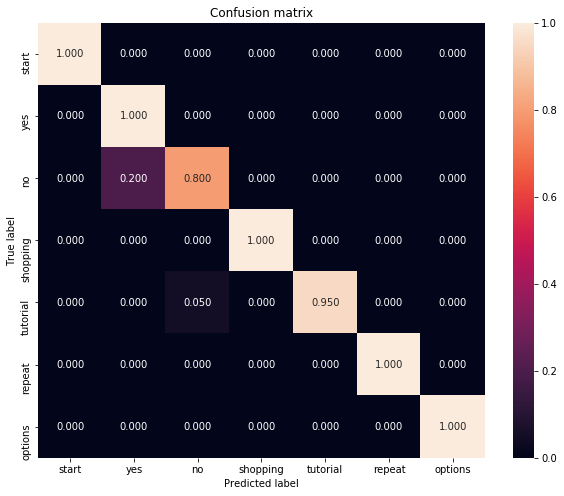

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

# Compute confusion matrix and plot as heatmap
words = ["start","yes","no","shopping","tutorial","repeat","options"]
cm = confusion_matrix(y_true, preds)
plot_confusion_matrix(cm, title="Confusion matrix", classes=words)